# Assignment 6 CSE 252A Eskil Berg Ould-Saada

## Problem 4f

In [200]:
import matplotlib.pyplot as plt
import math as m

def update_f(x_0,n_iter):
    updates = []
    updates.append(x_0)
    x = x_0
    for i in range(n_iter):
        x = x - m.tanh(x)
        updates.append(x)
    return updates


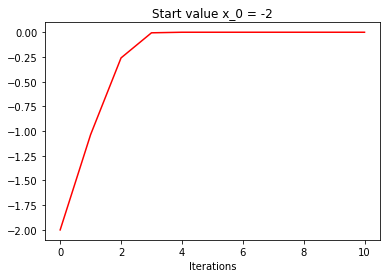

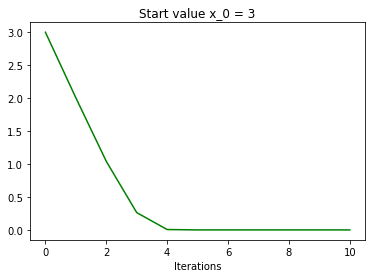

In [201]:
# Start value x_0 = -2
updates = update_f(x_0=-2,n_iter=10)
plt.plot(updates,'-r')
plt.title("Start value x_0 = -2")
plt.xlabel("Iterations")
plt.show()

# Start value x_0 = 3
updates = update_f(x_0=3,n_iter=10)
plt.plot(updates, '-g')
plt.title("Start value x_0 = 3")
plt.xlabel("Iterations")
plt.show()



## Problem 4g

In [202]:
def update_g(x_0,n_iter):
    updates = []
    updates.append(x_0)
    x = x_0
    for i in range(n_iter):
        try:
            x = x - (1/2)*m.sinh(2*x)
            updates.append(x)
        except OverflowError:
            print("Diverges")
            break
    return updates

Diverges


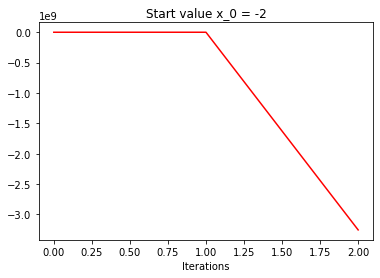

Diverges


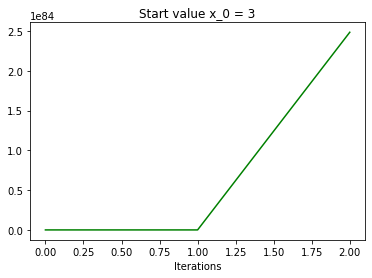

In [203]:
# Start value x_0 = -2
updates = update_g(x_0=-2,n_iter=10)
plt.plot(updates,'-r')
plt.title("Start value x_0 = -2")
plt.xlabel("Iterations")
plt.show()

# Start value x_0 = 3
updates = update_g(x_0=3,n_iter=10)
plt.plot(updates, '-g')
plt.title("Start value x_0 = 3")
plt.xlabel("Iterations")
plt.show()

## Problem 4k

In [204]:
import numpy as np

def update_k(x_0):
    updates = []
    updates.append(x_0)
    x = x_0
    diff = 1
    while abs(diff)>0:
        x_prev = round(x,5)
        add = 0
        for k in range(1,11):
            add += m.tanh(x+(2/np.sqrt(k)))
        x = x - (1/10)*add
        updates.append(x)
        x_now = round(x,5)
        diff = x_now-x_prev
    return updates

def g(x):
    add = 0
    for k in range(1,11):
        add += np.log(m.cosh(x+(2/np.sqrt(k))))
    return (1/10)*add

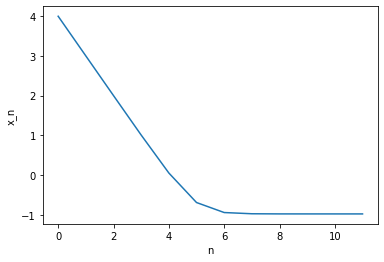

Minimum value of g(x) is 0.07421 for x = -0.9799819756927353.


In [205]:
updates = update_k(4)
minx = updates[-1]
plt.plot(updates)
plt.ylabel("x_n")
plt.xlabel("n")
plt.show()
min_g = g(minx)
print(f"Minimum value of g(x) is {round(min_g,5)} for x = {minx}.")

## Problem 3d

In [206]:
f = open("noisyOrX.txt", "r")
X = np.array([line.rstrip(' \n').split(' ') for line in f]).astype(int)
f.close()

f = open("noisyOrY.txt", "r")
Y = np.array([line.rstrip("\n") for line in f]).astype(int)
f.close()

In [207]:
T = len(X)
n_iter = 256
n = 23
p_i = 0.05*np.ones(n)

# Find T_i (number of times x=1)
T_i = np.zeros(n)
for i in range(len(X)):
    for j in range(n):
        if X[i][j] == 1:
            T_i[j] += 1

In [208]:
L = np.zeros(n_iter+1)
M = np.zeros(n_iter+1)

In [209]:
def EM_algorithm(p_i, T, n, T_i, n_iter, log, M, X, Y):
    for k in range(n_iter+1):

        # Log likelihood
        for t in range(T):
            term1 = 0
            term2 = 1
            for i in range(n):
                term1 += X[t][i]*np.log(1-p_i[i])
                term2 *= np.power((1-p_i[i]),X[t][i])
            L[k] += ((1-Y[t])*term1 + Y[t]*np.log(1-term2))
        L[k] = L[k]/T

        # Mistakes
        prob = np.zeros(T)
        for t in range(T):
            tp = 1
            for i in range(n):
                tp *= np.power((1-p_i[i]),X[t][i])
            prob[t] = 1-tp
            if ((Y[t]==1 and prob[t]<=0.5) or (Y[t]==0 and prob[t]>=0.5)):
                M[k] += 1
        
        # E step
        posterior = np.zeros((T,n))
        for t in range(T):
            denom_prod = 1
            for i in range(n):
                denom_prod *= np.power((1-p_i[i]),X[t][i])
            for j in range(n):
                posterior[t][j] = Y[t]*X[t][j]*p_i[j]/(1-denom_prod)
        
        # M step
        for i in range(n):
            x = 0
            for t in range(T):
                x += posterior[t][i]
            p_i[i] = (1/T_i[i])*x
    return M, L

In [210]:
M, L = EM_algorithm(p_i, T, n, T_i, n_iter, log, M, X, Y)

In [215]:
print(f"Iteration: 0 \t Mistakes: {M[0]} \t Log: {round(L[0],5)}")
print(f"Iteration: 1 \t Mistakes: {M[1]} \t Log: {round(L[1],5)}")
print(f"Iteration: 2 \t Mistakes: {M[2]} \t Log: {round(L[2],5)}")
print(f"Iteration: 4 \t Mistakes: {M[4]} \t Log: {round(L[4],5)}")
print(f"Iteration: 8 \t Mistakes: {M[8]} \t Log: {round(L[8],5)}")
print(f"Iteration: 16 \t Mistakes: {M[16]} \t Log: {round(L[16],5)}")
print(f"Iteration: 32 \t Mistakes: {M[32]} \t Log: {round(L[32],5)}")
print(f"Iteration: 64 \t Mistakes: {M[64]} \t Log: {round(L[64],5)}")
print(f"Iteration: 128 \t Mistakes: {M[128]} \t Log: {round(L[128],5)}")
print(f"Iteration: 256 \t Mistakes: {M[256]} \t Log: {round(L[256],5)}")

Iteration: 0 	 Mistakes: 175.0 	 Log: -0.95809
Iteration: 1 	 Mistakes: 56.0 	 Log: -0.49592
Iteration: 2 	 Mistakes: 43.0 	 Log: -0.40822
Iteration: 4 	 Mistakes: 42.0 	 Log: -0.36461
Iteration: 8 	 Mistakes: 44.0 	 Log: -0.3475
Iteration: 16 	 Mistakes: 40.0 	 Log: -0.33462
Iteration: 32 	 Mistakes: 37.0 	 Log: -0.32258
Iteration: 64 	 Mistakes: 37.0 	 Log: -0.31483
Iteration: 128 	 Mistakes: 36.0 	 Log: -0.31116
Iteration: 256 	 Mistakes: 36.0 	 Log: -0.31016
